<a href="https://colab.research.google.com/github/EngOsamaHaikal/Time-series-forecasting-Task1/blob/master/src/model_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
from TimeSeriesModule import seq2seq_window_dataset , model_forecast
keras= tf.keras
tf.random.set_seed(42)
np.random.seed(42)


# prepare the time series data :

In [8]:
sensor_data = pd.read_csv('/content/TVC_logger_ 3_betula.csv')

time = np.arange(107823)
window_size = 32 
humidity_series = pd.DataFrame(sensor_data['VWC.m3.per.m3.hummock'].values)
humidity_reads = np.array(sensor_data["VWC.m3.per.m3.hummock"])

split_ratio = int(len(time)*0.70)

time_train = time[:split_ratio]

x_train = humidity_reads[:split_ratio]

time_valid = time[split_ratio:]

x_valid = humidity_reads[split_ratio:]

# load the wavenet model

> Make sure that the model is in your directory



In [9]:
model_1 = keras.models.load_model("wavenetModel (1).h5")


In [10]:
cnn_forecast = model_forecast(model_1, humidity_series , window_size)
cnn_forecast = cnn_forecast[split_ratio - window_size:-1, -1, 0]

In [11]:
keras.metrics.mean_absolute_error(x_valid, cnn_forecast).numpy()

0.00019387253

In [12]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, None, 32)          64        
_________________________________________________________________
conv1d_9 (Conv1D)            (None, None, 32)          1056      
_________________________________________________________________
conv1d_10 (Conv1D)           (None, None, 32)          1056      
_________________________________________________________________
conv1d_11 (Conv1D)           (None, None, 32)          1056      
_________________________________________________________________
conv1d_12 (Conv1D)           (None, None, 32)          1056      
_________________________________________________________________
conv1d_13 (Conv1D)           (None, None, 32)          1056      
_________________________________________________________________
conv1d_14 (Conv1D)           (None, None, 32)         

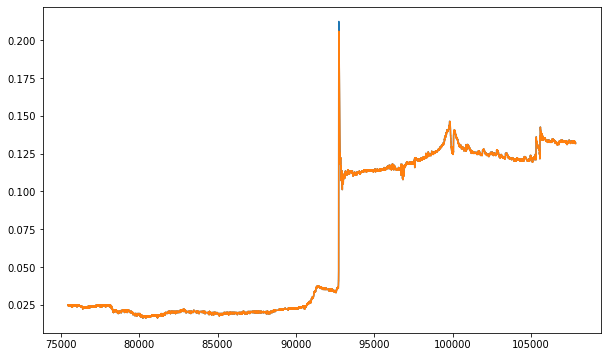

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(time_valid, x_valid)
plt.plot(time_valid, cnn_forecast)

# Load the LSTM model

In [34]:
model_2 = keras.models.load_model("LSTM_CNN.h5")

In [35]:
cnn_forecast_2 = model_forecast(model_2, humidity_series , window_size)
cnn_forecast_2 = cnn_forecast_2[split_ratio - window_size:-1, -1, 0]

In [36]:
keras.metrics.mean_absolute_error(x_valid, cnn_forecast_2).numpy()

0.00019311179

In [37]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 32)          96        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 1)           33        
_________________________________________________________________
lstm (LSTM)                  (None, None, 32)          4352      
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
dense (Dense)                (None, None, 1)           33        
Total params: 12,834
Trainable params: 12,834
Non-trainable params: 0
_________________________________________________________________


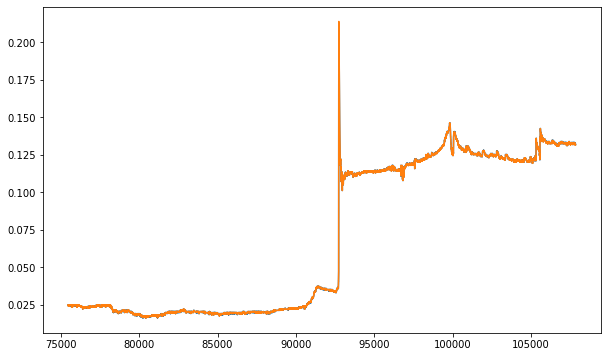

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(time_valid, x_valid)
plt.plot(time_valid, cnn_forecast_2)